In [1]:
import os
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from pyspectrum import Spectrum

from core.data import Temperature, TemperatureUnits, Calibration


In [2]:
wavelength_range = (630, 820)  # in nm

In [3]:
filedir = os.path.join('.', 'data', '2023_05_16 13_56')

In [4]:
results = []
for dirpath, dirnames, filenames in os.walk(filedir):
    for filename in tqdm(filenames[:10]):
        dt = datetime.strptime(filename, '%Y_%m_%d %H_%M_%S')
        temperature = Temperature(
            spectrum=Spectrum.load(os.path.join(filedir, filename)),
            calibration=Calibration.load(os.path.join(filedir, filenames[-1]), T=2800),
            units=TemperatureUnits.kelvin,
        )

        data = temperature.calcualte(wavelength_range)
        results.append(
            (dt, np.mean(data.values), np.std(data.values, ddof=1))
        )

results = np.array(results)

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\Exinker\Documents\application-room\spectral-pyrometer\pyrometer\core\data.py:27: RuntimeWarning: divide by zero encountered in log
  y=4*np.log(w) + np.log(spectrum.intensity),
c:\Users\Exinker\Documents\application-room\spectral-pyrometer\pyrometer\core\data.py:27: RuntimeWarning: invalid value encountered in log
  y=4*np.log(w) + np.log(spectrum.intensity),
100%|██████████| 10/10 [00:02<00:00,  4.84it/s]


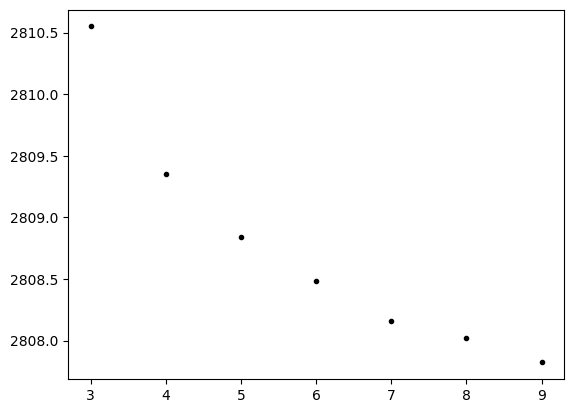

In [5]:
n_results = results.shape[0]

x, y = np.arange(n_results), results[:,1]
plt.plot(
    x, y,
    color='k', linestyle='none', marker='.',
)

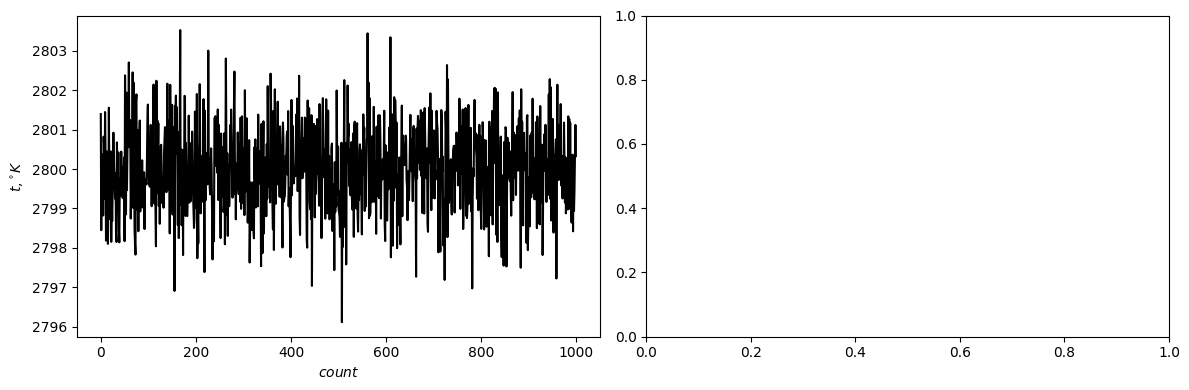

In [12]:
i = -1

temperature = Temperature(
    spectrum=Spectrum.load(os.path.join(filedir, filenames[i])),
    calibration=Calibration.load(os.path.join(filedir, filenames[-1]), T=2800),
    units=TemperatureUnits.kelvin,
)

data = temperature.calcualte(wavelength_range)
data.show()


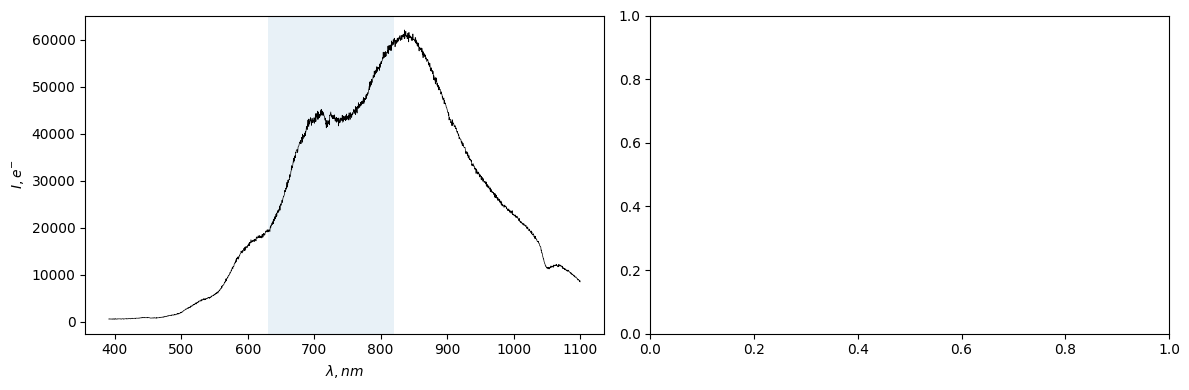

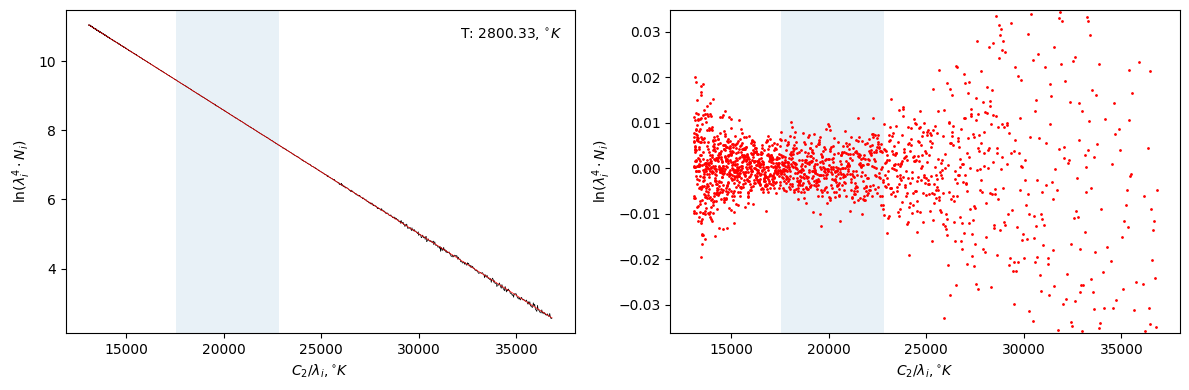

In [14]:
data.show_frame(t=-1)